# Fake News Classifier Using LSTM

Dataset: https://github.com/FakeNewsChallenge/fnc-1


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Preparación dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))
torch.cuda.empty_cache()

Tesla P100-PCIE-16GB


###Creación del Modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModelo():
  K.clear_session( )
  model=Sequential( )
  #model.add(Dense(64,,activation='relu'))
  model.add(LSTM(100,input_shape=(1,20000)))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModeloDropout():
  K.clear_session( )
  model=Sequential( )
  model.add(LSTM(50,input_shape=(1,20000)))
  model.add(Dropout(0.2))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())

####Modelo 1


In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_train/y1_train_tensorp2.pt')

CPU times: user 3.07 s, sys: 2.82 s, total: 5.89 s
Wall time: 22.5 s
CPU times: user 498 ms, sys: 1.12 s, total: 1.62 s
Wall time: 15.6 s
CPU times: user 499 ms, sys: 1.04 s, total: 1.54 s
Wall time: 24.4 s
CPU times: user 1.21 ms, sys: 2.03 ms, total: 3.24 ms
Wall time: 253 ms
CPU times: user 1.01 ms, sys: 1.01 ms, total: 2.02 ms
Wall time: 151 ms
CPU times: user 1.67 ms, sys: 517 µs, total: 2.19 ms
Wall time: 130 ms


Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModelo()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 9s 6ms/step - loss: 0.4868 - categorical_accuracy: 0.7453
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1457 - categorical_accuracy: 0.9466
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0833 - categorical_accuracy: 0.9718
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0632 - categorical_accuracy: 0.9786
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0429 - categorical_accuracy: 0.9866
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0334 - categorical_accuracy: 0.9902
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0270 - categorical_accuracy: 0.9914
Epoch 8/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0178 - categorical_accuracy: 0.9946
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0162 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 4s 6ms/step - loss: 0.4969 - categorical_accuracy: 0.8977
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1367 - categorical_accuracy: 0.9509
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1046 - categorical_accuracy: 0.9627
Epoch 4/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0805 - categorical_accuracy: 0.9718
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0597 - categorical_accuracy: 0.9803
Epoch 6/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0427 - categorical_accuracy: 0.9861
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0291 - categorical_accuracy: 0.9910
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0192 - categorical_accuracy: 0.9944
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0117 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 4s 6ms/step - loss: 0.4372 - categorical_accuracy: 0.9129
Epoch 2/20
744/744 [==============================] - 4s 6ms/step - loss: 0.1248 - categorical_accuracy: 0.9564
Epoch 3/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0924 - categorical_accuracy: 0.9669
Epoch 4/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0680 - categorical_accuracy: 0.9780
Epoch 5/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0477 - categorical_accuracy: 0.9857
Epoch 6/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0316 - categorical_accuracy: 0.9911
Epoch 7/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0194 - categorical_accuracy: 0.9948
Epoch 8/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0114 - categorical_accuracy: 0.9976
Epoch 9/20
744/744 [==============================] - 5s 6ms/step - loss: 0.0066 - categorical_accuracy:

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain40.h5')

In [3]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain40.h5')

In [5]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.33 s, sys: 1.31 s, total: 2.64 s
Wall time: 12.1 s
CPU times: user 211 ms, sys: 489 ms, total: 700 ms
Wall time: 7.15 s
CPU times: user 248 ms, sys: 906 ms, total: 1.15 s
Wall time: 8.91 s
CPU times: user 5.33 ms, sys: 38.8 ms, total: 44.1 ms
Wall time: 602 ms
CPU times: user 3.47 ms, sys: 1.54 ms, total: 5.01 ms
Wall time: 426 ms
CPU times: user 4.25 ms, sys: 472 µs, total: 4.72 ms
Wall time: 466 ms
CPU times: user 57.3 ms, sys: 854 ms, total: 911 ms
Wall time: 11.2 s
CPU times: user 53 ms, sys: 1.27 s, total: 1.33 s
Wall time: 16.3 s
CPU times: user 40.8 ms, sys: 1.18 s, total: 1.22 s
Wall time: 13.1 s
CPU times: user 3.56 ms, sys: 1.03 ms, total: 4.59 ms
Wall time: 386 ms
CPU times: user 2.85 ms, sys: 2.42 ms, total: 5.27 ms
Wall time: 505 ms
CPU times: user 5.6 ms, sys: 0 ns, total: 5.6 ms
Wall time: 496 ms


In [6]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [7]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [8]:
#validacion
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 8s - loss: 0.7459 - categorical_accuracy: 0.9165 - 8s/epoch - 17ms/step
469/469 - 2s - loss: 0.7767 - categorical_accuracy: 0.9162 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7543 - categorical_accuracy: 0.9167 - 2s/epoch - 4ms/step


[0.7543116807937622, 0.9166995882987976]

In [9]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain40PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9166719372588704
precision: 0.913420051616692
recall: 0.9147470039473553
f1: 0.9166719372588704


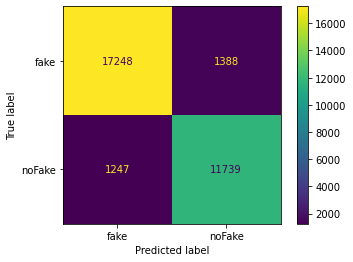

In [10]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


#####Probando modelo en muestra 2 y 3

In [1]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain40PostEvaluate.h5')

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp2.pt')
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.26 s, sys: 1.29 s, total: 2.55 s
Wall time: 7.68 s
CPU times: user 232 ms, sys: 441 ms, total: 673 ms
Wall time: 3.29 s
CPU times: user 239 ms, sys: 836 ms, total: 1.07 s
Wall time: 3.86 s
CPU times: user 1.49 ms, sys: 1.13 ms, total: 2.62 ms
Wall time: 5.75 ms
CPU times: user 1.24 ms, sys: 0 ns, total: 1.24 ms
Wall time: 2.4 ms
CPU times: user 1.42 ms, sys: 17 µs, total: 1.44 ms
Wall time: 2.21 ms
CPU times: user 279 ms, sys: 507 ms, total: 786 ms
Wall time: 3.48 s
CPU times: user 228 ms, sys: 459 ms, total: 687 ms
Wall time: 3.56 s
CPU times: user 334 ms, sys: 551 ms, total: 885 ms
Wall time: 4.39 s
CPU times: user 4.61 ms, sys: 8.79 ms, total: 13.4 ms
Wall time: 16.6 ms
CPU times: user 791 µs, sys: 0 ns, total: 791 µs
Wall time: 2.89 ms
CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 2.32 ms


In [3]:
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 8s - 8s/epoch - 9ms/step
31622
acc: 0.9298905825058503
precision: 0.927096743744122
recall: 0.9282964992067836
f1: 0.9298905825058503


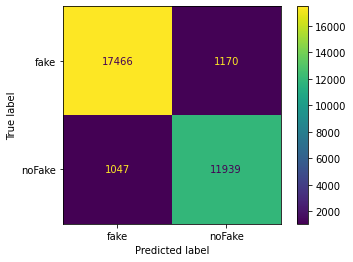

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m1.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 8s - 8s/epoch - 8ms/step
31622
acc: 0.9290999936752894
precision: 0.9261068539267977
recall: 0.9277658329489644
f1: 0.9290999936752894


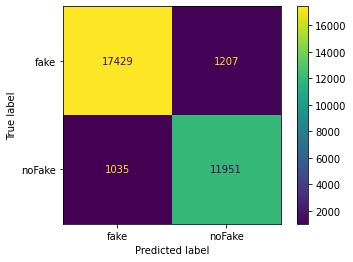

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m1.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

####Modelo 2


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_train/y2_train_tensorp2.pt')

CPU times: user 3.15 s, sys: 2.8 s, total: 5.95 s
Wall time: 13.1 s
CPU times: user 506 ms, sys: 1.13 s, total: 1.64 s
Wall time: 19.2 s
CPU times: user 476 ms, sys: 1.07 s, total: 1.55 s
Wall time: 27 s
CPU times: user 1.35 ms, sys: 1.29 ms, total: 2.64 ms
Wall time: 235 ms
CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 117 ms
CPU times: user 2.34 ms, sys: 0 ns, total: 2.34 ms
Wall time: 175 ms


Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModelo()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 7s 6ms/step - loss: 0.4810 - categorical_accuracy: 0.7541
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1434 - categorical_accuracy: 0.9497
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0879 - categorical_accuracy: 0.9705
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0625 - categorical_accuracy: 0.9799
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0413 - categorical_accuracy: 0.9867
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0324 - categorical_accuracy: 0.9899
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0253 - categorical_accuracy: 0.9916
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0191 - categorical_accuracy: 0.9937
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0166 - categorical_accuracy:

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.4759 - categorical_accuracy: 0.8974
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1420 - categorical_accuracy: 0.9476
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1083 - categorical_accuracy: 0.9600
Epoch 4/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0821 - categorical_accuracy: 0.9700
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0597 - categorical_accuracy: 0.9797
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0413 - categorical_accuracy: 0.9866
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0280 - categorical_accuracy: 0.9912
Epoch 8/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0177 - categorical_accuracy: 0.9951
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0110 - categorical_accuracy:

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 5s 6ms/step - loss: 0.4157 - categorical_accuracy: 0.9146
Epoch 2/20
744/744 [==============================] - 4s 6ms/step - loss: 0.1266 - categorical_accuracy: 0.9567
Epoch 3/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0934 - categorical_accuracy: 0.9678
Epoch 4/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0689 - categorical_accuracy: 0.9765
Epoch 5/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0479 - categorical_accuracy: 0.9852
Epoch 6/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0308 - categorical_accuracy: 0.9915
Epoch 7/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0187 - categorical_accuracy: 0.9956
Epoch 8/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0104 - categorical_accuracy: 0.9979
Epoch 9/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0056 - categorical_accuracy:

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain40.h5')

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain40.h5')

In [3]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.26 s, sys: 1.26 s, total: 2.52 s
Wall time: 7.7 s
CPU times: user 218 ms, sys: 530 ms, total: 748 ms
Wall time: 3.48 s
CPU times: user 209 ms, sys: 902 ms, total: 1.11 s
Wall time: 3.99 s
CPU times: user 1.51 ms, sys: 242 µs, total: 1.75 ms
Wall time: 4.92 ms
CPU times: user 1.28 ms, sys: 62 µs, total: 1.34 ms
Wall time: 2.37 ms
CPU times: user 1.11 ms, sys: 0 ns, total: 1.11 ms
Wall time: 2.11 ms
CPU times: user 91.2 ms, sys: 821 ms, total: 912 ms
Wall time: 13.9 s
CPU times: user 43.6 ms, sys: 1.34 s, total: 1.38 s
Wall time: 13.8 s
CPU times: user 43.8 ms, sys: 1.24 s, total: 1.28 s
Wall time: 11.9 s
CPU times: user 2.29 ms, sys: 2.61 ms, total: 4.89 ms
Wall time: 485 ms
CPU times: user 4.17 ms, sys: 1.91 ms, total: 6.08 ms
Wall time: 465 ms
CPU times: user 4.02 ms, sys: 60 µs, total: 4.08 ms
Wall time: 494 ms


In [4]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [5]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [8]:
#validacion
import numpy as np
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

469/469 - 7s - loss: 0.8137 - categorical_accuracy: 0.9153 - 7s/epoch - 16ms/step
469/469 - 2s - loss: 0.7580 - categorical_accuracy: 0.9183 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7871 - categorical_accuracy: 0.9176 - 2s/epoch - 4ms/step


[0.7870749235153198, 0.9175563454627991]

In [9]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain40PostEvaluate.h5')

989/989 - 5s - 5s/epoch - 5ms/step
31622
acc: 0.9173676554297641
precision: 0.9147873959409294
recall: 0.9144267488751652
f1: 0.9173676554297641


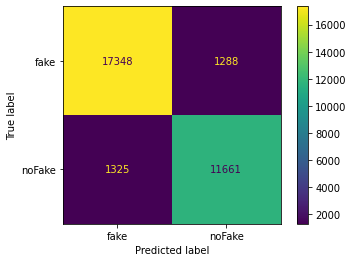

In [10]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


#####Probando modelo en muestra 1 y 3

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain40PostEvaluate.h5')

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp2.pt')
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.5 s, sys: 1.38 s, total: 2.88 s
Wall time: 9.41 s
CPU times: user 219 ms, sys: 535 ms, total: 754 ms
Wall time: 3.32 s
CPU times: user 231 ms, sys: 913 ms, total: 1.14 s
Wall time: 3.89 s
CPU times: user 2.33 ms, sys: 163 µs, total: 2.49 ms
Wall time: 5.93 ms
CPU times: user 1.3 ms, sys: 90 µs, total: 1.39 ms
Wall time: 2.28 ms
CPU times: user 986 µs, sys: 269 µs, total: 1.25 ms
Wall time: 2.28 ms
CPU times: user 255 ms, sys: 617 ms, total: 872 ms
Wall time: 3.4 s
CPU times: user 223 ms, sys: 472 ms, total: 695 ms
Wall time: 3.5 s
CPU times: user 343 ms, sys: 580 ms, total: 923 ms
Wall time: 4.27 s
CPU times: user 2.55 ms, sys: 218 µs, total: 2.77 ms
Wall time: 4.14 ms
CPU times: user 951 µs, sys: 649 µs, total: 1.6 ms
Wall time: 2.52 ms
CPU times: user 1.39 ms, sys: 0 ns, total: 1.39 ms
Wall time: 2.29 ms


In [3]:
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 8s - 8s/epoch - 8ms/step
31622
acc: 0.9303333122509645
precision: 0.9286032955803307
recall: 0.9272830041314161
f1: 0.9303333122509645


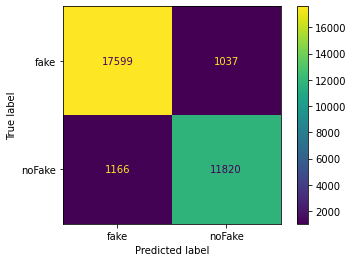

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m2.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 14s - 14s/epoch - 14ms/step
31622
acc: 0.9289102523559547
precision: 0.926828673708898
recall: 0.9262040688261471
f1: 0.9289102523559547


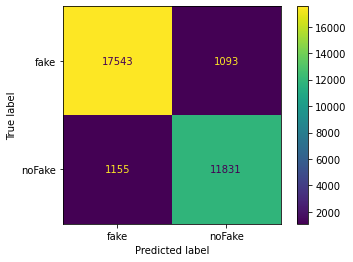

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m2.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

####Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_train/y3_train_tensorp2.pt')

CPU times: user 3.1 s, sys: 2.74 s, total: 5.84 s
Wall time: 12.8 s
CPU times: user 532 ms, sys: 1.1 s, total: 1.63 s
Wall time: 18.5 s
CPU times: user 485 ms, sys: 1.12 s, total: 1.6 s
Wall time: 23.9 s
CPU times: user 3.23 ms, sys: 112 µs, total: 3.34 ms
Wall time: 821 ms
CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms
Wall time: 130 ms
CPU times: user 1.83 ms, sys: 688 µs, total: 2.52 ms
Wall time: 219 ms


Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModelo()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 7s 6ms/step - loss: 0.4870 - categorical_accuracy: 0.7542
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1482 - categorical_accuracy: 0.9455
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0876 - categorical_accuracy: 0.9717
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0666 - categorical_accuracy: 0.9792
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0449 - categorical_accuracy: 0.9863
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0339 - categorical_accuracy: 0.9883
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0267 - categorical_accuracy: 0.9902
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0214 - categorical_accuracy: 0.9923
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0168 - categorical_accuracy:

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.4710 - categorical_accuracy: 0.8960
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1409 - categorical_accuracy: 0.9467
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1060 - categorical_accuracy: 0.9588
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0789 - categorical_accuracy: 0.9715
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0562 - categorical_accuracy: 0.9804
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0374 - categorical_accuracy: 0.9873
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0239 - categorical_accuracy: 0.9930
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0145 - categorical_accuracy: 0.9961
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 0.0088 - categorical_accuracy:

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 4s 6ms/step - loss: 0.4430 - categorical_accuracy: 0.9123
Epoch 2/20
744/744 [==============================] - 4s 6ms/step - loss: 0.1271 - categorical_accuracy: 0.9564
Epoch 3/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0935 - categorical_accuracy: 0.9669
Epoch 4/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0688 - categorical_accuracy: 0.9771
Epoch 5/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0481 - categorical_accuracy: 0.9855
Epoch 6/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0315 - categorical_accuracy: 0.9909
Epoch 7/20
744/744 [==============================] - 5s 6ms/step - loss: 0.0191 - categorical_accuracy: 0.9953
Epoch 8/20
744/744 [==============================] - 5s 6ms/step - loss: 0.0108 - categorical_accuracy: 0.9977
Epoch 9/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0058 - categorical_accuracy:

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain40.h5')

In [1]:
from keras.models import load_model
%time m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain40.h5')

CPU times: user 1.07 s, sys: 1.21 s, total: 2.28 s
Wall time: 5.28 s


In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.51 s, sys: 1.49 s, total: 2.99 s
Wall time: 9.22 s
CPU times: user 201 ms, sys: 499 ms, total: 700 ms
Wall time: 3.49 s
CPU times: user 227 ms, sys: 911 ms, total: 1.14 s
Wall time: 3.88 s
CPU times: user 2.77 ms, sys: 0 ns, total: 2.77 ms
Wall time: 4.72 ms
CPU times: user 1.5 ms, sys: 272 µs, total: 1.77 ms
Wall time: 2.18 ms
CPU times: user 1.43 ms, sys: 0 ns, total: 1.43 ms
Wall time: 2.46 ms
CPU times: user 76.5 ms, sys: 836 ms, total: 912 ms
Wall time: 10.8 s
CPU times: user 104 ms, sys: 1.14 s, total: 1.24 s
Wall time: 15.1 s
CPU times: user 75 ms, sys: 1.19 s, total: 1.27 s
Wall time: 14 s
CPU times: user 5.22 ms, sys: 0 ns, total: 5.22 ms
Wall time: 488 ms
CPU times: user 4.55 ms, sys: 131 µs, total: 4.68 ms
Wall time: 516 ms
CPU times: user 4.14 ms, sys: 1.8 ms, total: 5.94 ms
Wall time: 956 ms


In [3]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [6]:
#validacion
import numpy as np
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

469/469 - 8s - loss: 0.7357 - categorical_accuracy: 0.9165 - 8s/epoch - 16ms/step
469/469 - 2s - loss: 0.7425 - categorical_accuracy: 0.9150 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7375 - categorical_accuracy: 0.9176 - 2s/epoch - 4ms/step


[0.7374563217163086, 0.9175563454627991]

In [7]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain40PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9169249256846499
precision: 0.9161121714297276
recall: 0.9117398359261333
f1: 0.9169249256846499


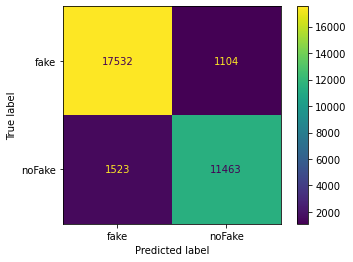

In [8]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')



#####Probando modelo en muestra 1 y 2

In [1]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain40PostEvaluate.h5')

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y1_test/y1_test_tensorp2.pt')
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores40/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.37 s, sys: 1.45 s, total: 2.82 s
Wall time: 9.41 s
CPU times: user 217 ms, sys: 481 ms, total: 698 ms
Wall time: 3.63 s
CPU times: user 218 ms, sys: 894 ms, total: 1.11 s
Wall time: 3.88 s
CPU times: user 3.29 ms, sys: 36.4 ms, total: 39.7 ms
Wall time: 42.6 ms
CPU times: user 1.18 ms, sys: 164 µs, total: 1.34 ms
Wall time: 2.64 ms
CPU times: user 1.08 ms, sys: 402 µs, total: 1.49 ms
Wall time: 2.63 ms
CPU times: user 253 ms, sys: 610 ms, total: 862 ms
Wall time: 3.78 s
CPU times: user 224 ms, sys: 475 ms, total: 699 ms
Wall time: 3.79 s
CPU times: user 340 ms, sys: 579 ms, total: 919 ms
Wall time: 4.7 s
CPU times: user 1.07 ms, sys: 29 µs, total: 1.1 ms
Wall time: 5.34 ms
CPU times: user 1.6 ms, sys: 0 ns, total: 1.6 ms
Wall time: 4.3 ms
CPU times: user 1.46 ms, sys: 0 ns, total: 1.46 ms
Wall time: 2.46 ms


In [3]:
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 11s - 11s/epoch - 11ms/step
31622
acc: 0.9274239453545
precision: 0.9270953036707587
recall: 0.9225617334790878
f1: 0.9274239453545


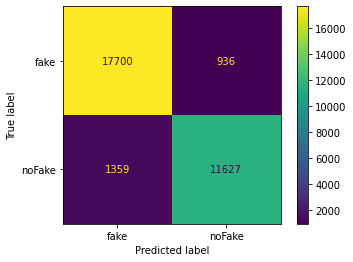

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m3.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 9s - 9s/epoch - 9ms/step
31622
acc: 0.9258111441401556
precision: 0.9252938062710861
recall: 0.9210183159257446
f1: 0.9258111441401556


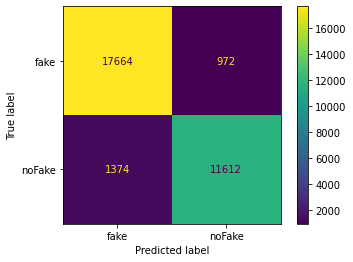

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m3.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

### Model Training

### Performance Metrics And Accuracy

Modelos con dropout

In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp2.pt')

CPU times: user 3.11 s, sys: 2.89 s, total: 5.99 s
Wall time: 13.9 s
CPU times: user 502 ms, sys: 1.13 s, total: 1.63 s
Wall time: 20.3 s
CPU times: user 482 ms, sys: 1.08 s, total: 1.56 s
Wall time: 29.1 s
CPU times: user 2.43 ms, sys: 633 µs, total: 3.06 ms
Wall time: 302 ms
CPU times: user 1.85 ms, sys: 683 µs, total: 2.54 ms
Wall time: 245 ms
CPU times: user 2.27 ms, sys: 166 µs, total: 2.43 ms
Wall time: 258 ms


Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModeloDropout()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 7s 5ms/step - loss: 0.5320 - categorical_accuracy: 0.7142
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1881 - categorical_accuracy: 0.9304
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 0.1287 - categorical_accuracy: 0.9533
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1061 - categorical_accuracy: 0.9615
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0808 - categorical_accuracy: 0.9720
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0678 - categorical_accuracy: 0.9770
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0563 - categorical_accuracy: 0.9805
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0501 - categorical_accuracy: 0.9840
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0419 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4394 - categorical_accuracy: 0.8872
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1839 - categorical_accuracy: 0.9324
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1473 - categorical_accuracy: 0.9451
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1211 - categorical_accuracy: 0.9558
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0990 - categorical_accuracy: 0.9644
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0801 - categorical_accuracy: 0.9722
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0642 - categorical_accuracy: 0.9781
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0495 - categorical_accuracy: 0.9837
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0380 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
737/737 [==============================] - 4s 5ms/step - loss: 0.3749 - categorical_accuracy: 0.9132
Epoch 2/20
737/737 [==============================] - 4s 5ms/step - loss: 0.1543 - categorical_accuracy: 0.9485
Epoch 3/20
737/737 [==============================] - 4s 5ms/step - loss: 0.1173 - categorical_accuracy: 0.9605
Epoch 4/20
737/737 [==============================] - 4s 5ms/step - loss: 0.0925 - categorical_accuracy: 0.9688
Epoch 5/20
737/737 [==============================] - 4s 5ms/step - loss: 0.0720 - categorical_accuracy: 0.9772
Epoch 6/20
737/737 [==============================] - 4s 5ms/step - loss: 0.0552 - categorical_accuracy: 0.9829
Epoch 7/20
737/737 [==============================] - 4s 5ms/step - loss: 0.0420 - categorical_accuracy: 0.9877
Epoch 8/20
737/737 [==============================] - 4s 5ms/step - loss: 0.0305 - categorical_accuracy: 0.9910
Epoch 9/20
737/737 [==============================] - 4s 5ms/step - loss: 0.0215 - categorical_accuracy:

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp2.pt',map_location=torch.device('cpu'))
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 20.7 ms, sys: 465 ms, total: 485 ms
Wall time: 4.01 s
CPU times: user 2.1 ms, sys: 485 ms, total: 487 ms
Wall time: 5.07 s
CPU times: user 1.27 ms, sys: 544 ms, total: 545 ms
Wall time: 4.91 s
CPU times: user 0 ns, sys: 2.56 ms, total: 2.56 ms
Wall time: 690 ms
CPU times: user 0 ns, sys: 2.24 ms, total: 2.24 ms
Wall time: 267 ms
CPU times: user 886 µs, sys: 1.35 ms, total: 2.24 ms
Wall time: 227 ms
CPU times: user 2.96 ms, sys: 1 s, total: 1.01 s
Wall time: 14.8 s
CPU times: user 0 ns, sys: 1.08 s, total: 1.08 s
Wall time: 16.9 s
CPU times: user 0 ns, sys: 1 s, total: 1 s
Wall time: 14.7 s
CPU times: user 0 ns, sys: 3.89 ms, total: 3.89 ms
Wall time: 2.78 s
CPU times: user 0 ns, sys: 3.03 ms, total: 3.03 ms
Wall time: 671 ms
CPU times: user 0 ns, sys: 2.59 ms, total: 2.59 ms
Wall time: 244 ms


In [ ]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [ ]:
modelo1

In [ ]:
#validacion
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModeloDropout()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModeloDropout()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

